# Cuaderno de investigación de los datos de 'shop'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos las librerias y los datos

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Para usar desde drive
df=pd.read_csv("/content/drive/MyDrive/Ingenieria_sistemas_informacion/Grupo 11/IN/bi-upo-project-csv/clean-shop.csv", index_col=0)

In [ ]:
#Para usar en local
#df = pd.read_csv("D:/Workspaces/VS-workspace/bi-upo-project-csv/clean-shop.csv", index_col=0)

## Exploración de los datos

In [ ]:
df[['country','category','product','colour','location','model_photography']].describe()

,country,category,product,colour,location,model_photography
count,161298,161298,161298,161298,161298,161298
unique,36,4,217,14,6,2
top,Poland,trousers,B4,black,top-left,frontal
freq,133963,48312,3486,29107,33553,119250


In [ ]:
df.describe()

,month,day,clicks,session_id,price,page
count,161298.000000,161298.000000,161298.000000,161298.000000,161298.000000,161298.000000
mean,5.583510,14.514204,9.896031,12042.622047,43.776079,1.715037
std,1.328879,8.828506,13.587986,7012.725751,12.541905,0.984659
min,4.000000,1.000000,1.000000,1.000000,18.000000,1.000000
25%,4.000000,7.000000,2.000000,5909.000000,33.000000,1.000000
50%,5.000000,14.000000,6.000000,11926.500000,43.000000,1.000000
75%,7.000000,22.000000,12.000000,18215.750000,52.000000,2.000000
max,8.000000,31.000000,195.000000,24026.000000,82.000000,5.000000


## Estudio de la distribución

Text(0.5, 1.0, 'Numero de paginas')

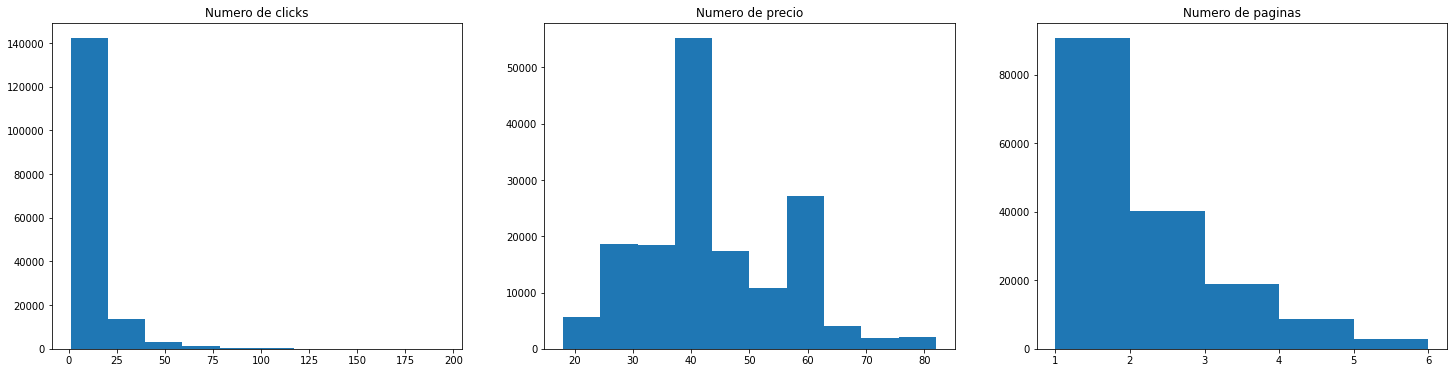

In [ ]:
plt.rcParams["figure.figsize"] = (25,6)
figure, axis = plt.subplots(1,3)

axis[0].hist(df.clicks)
axis[0].set_title("Numero de clicks") 
axis[1].hist(df.price)
axis[1].set_title("Numero de precio") 
axis[2].hist(df.page,bins=[1,2,3,4,5,6])
axis[2].set_title("Numero de paginas") 

Text(0.5, 1.0, 'Numero de paginas media por sesion')

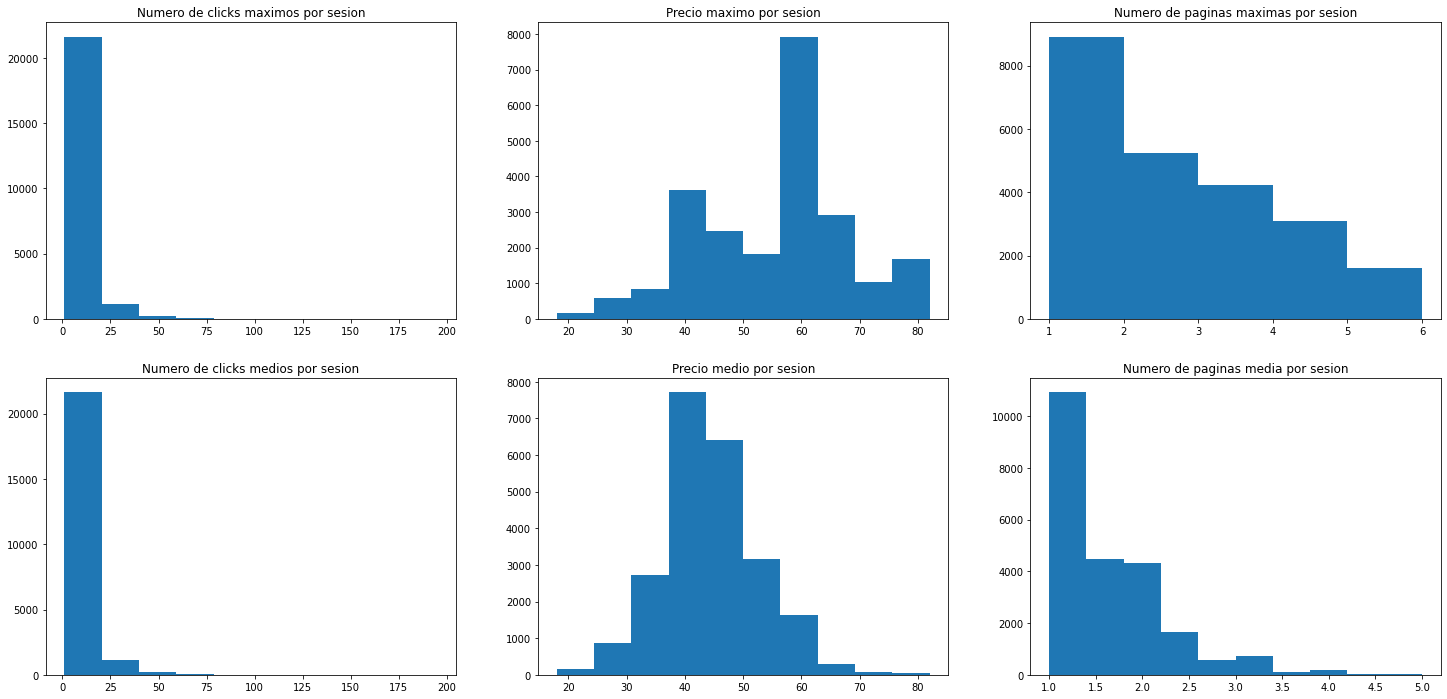

In [ ]:
df_sesion = df.groupby("session_id")


plt.rcParams["figure.figsize"] = (25,12)
figure, axis = plt.subplots(2,3)

axis[0,0].hist(df_sesion.clicks.max().tolist())
axis[0,0].set_title("Numero de clicks maximos por sesion")

axis[0,1].hist(df_sesion.price.max().tolist())
axis[0,1].set_title("Precio maximo por sesion")

axis[0,2].hist(df_sesion.page.max().tolist(),bins=[1,2,3,4,5,6])
axis[0,2].set_title("Numero de paginas maximas por sesion") 
####
#Realmente clicks medios por sesion es lo mismo que clicks máximos
axis[1,0].hist(df_sesion.clicks.count().tolist())
axis[1,0].set_title("Numero de clicks medios por sesion") 

axis[1,1].hist(df_sesion.price.mean().tolist())
axis[1,1].set_title("Precio medio por sesion") 

axis[1,2].hist(df_sesion.page.mean().tolist())
axis[1,2].set_title("Numero de paginas media por sesion") 

Vemos que la distribución del número de clicks es la más llamativa de todas, decidimos obtener las instancias con menos de 30 clicks y estudiar el conjunto a parte.

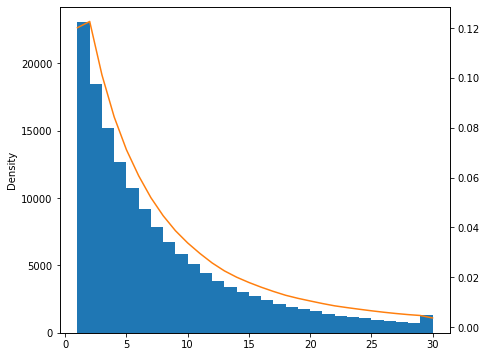

In [ ]:
seq=range(1,31,1)
v=df.clicks[df.clicks<31]

plt.rcParams["figure.figsize"] = (7,6)
ax = v.plot(kind='hist',bins=seq,zorder=3)
v.plot(kind='kde',ind=seq, ax=ax, secondary_y=True,zorder=3)

## Estudio de la correlación

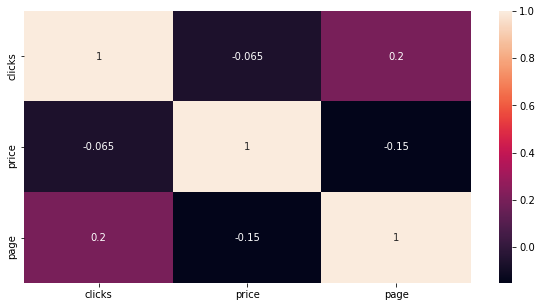

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
correlation_mat = df[["clicks","price","page"]].corr()

sns.heatmap(correlation_mat, annot = True)


plt.show()

In [ ]:
df_country=df.groupby('country')

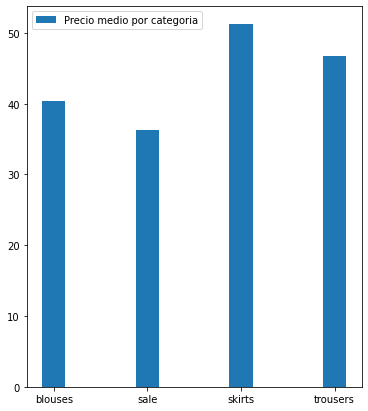

In [ ]:
df_category = df.groupby('category')
mPrice=df_category.price.mean().tolist()

keys=list(df_category.groups.keys())


plt.rcParams["figure.figsize"] = (6,7)

steps=range(1,len(keys*2),2)
plt.bar(steps,mPrice,0.5, label="Precio medio por categoria", zorder=3)

plt.xticks([1,3,5,7], keys)

plt.legend()
plt.show()

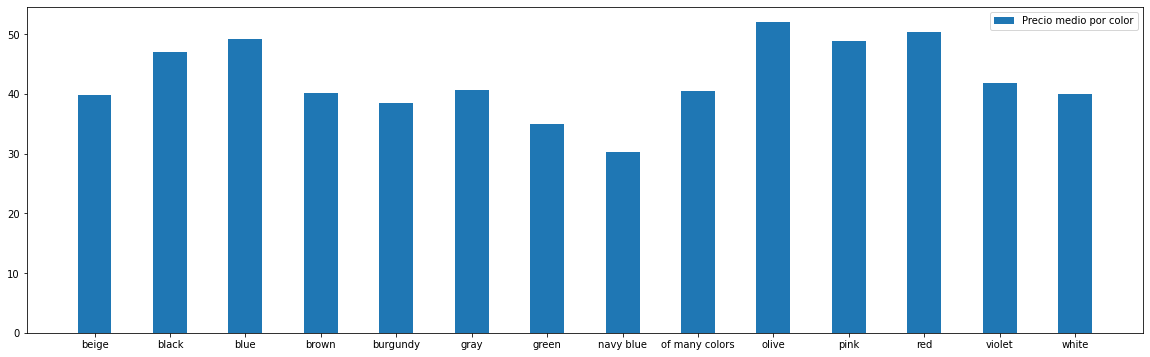

In [ ]:
df_colour = df.groupby('colour')
mPrice=df_colour.price.mean().tolist()

keys=list(df_colour.groups.keys())


plt.rcParams["figure.figsize"] = (20,6)


steps=range(1,len(keys*2),2)
plt.bar(steps,mPrice,0.9, label="Precio medio por color", zorder=3)

plt.xticks(steps, keys)

plt.legend()
plt.show()

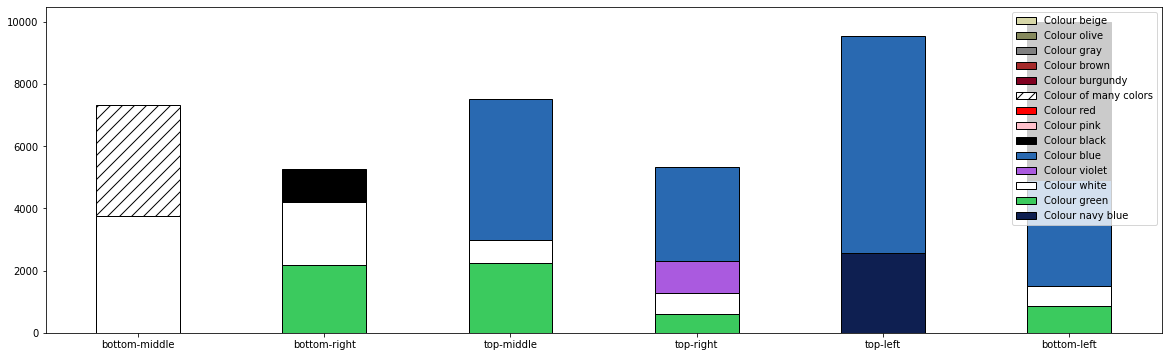

In [ ]:
colores=df.colour.unique().tolist()
locs=df.location.unique().tolist()

steps=range(1,len(locs*2),2)
coloresPlot=['#d7d7a8','#86895d','gray','brown','#800020','white','red','pink','black','#2969B1','#AA5ADF','white','#3BCA5E','#0E1F51']
for k,c in enumerate(colores):

    counts=[]
    df_aux = df[df.colour==c]
    
    for l in locs:
        counts.append(df_aux.location[df_aux.location==l].count())

    if c == 'of many colors':
        h='//'
    else:
        h=None
    plt.bar(steps,counts,0.9, label="Colour {}".format(c), zorder=3, edgecolor='black',color=coloresPlot[k], hatch=h)

plt.xticks(steps, locs)

plt.legend()
plt.show()

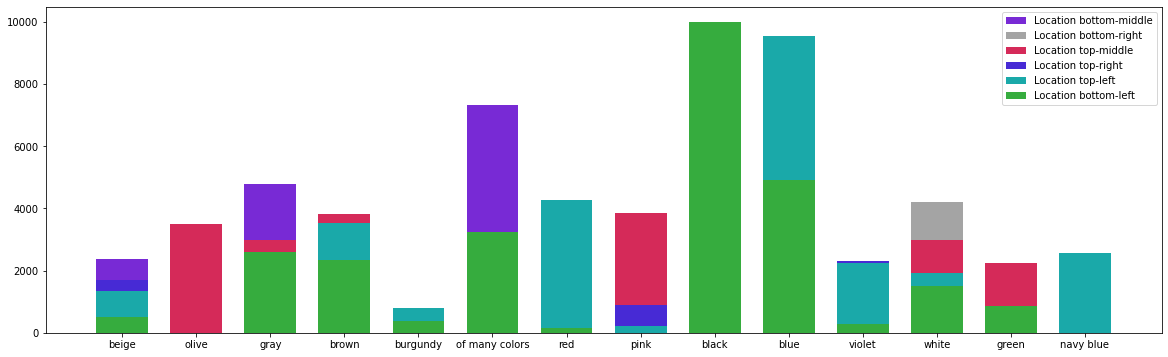

In [ ]:
colores=df.colour.unique().tolist()
locs=df.location.unique().tolist()

plt.rcParams["figure.figsize"] = (20,6)
steps=range(1,len(colores)*2,2)
#Morado,gris,rojo,azul oscuro,celeste,verde
coloresPlot=['#782AD5','#A4A4A4','#D52A59','#472AD5','#1AA9A9','#36AC3E']
for k,l in enumerate(locs):

    counts=[]
    df_aux = df[df.location==l]
    
    for c in colores:
        counts.append(df_aux.colour[df_aux.colour==c].count())

    plt.bar(steps,counts,1.4, label="Location {}".format(l), zorder=3,color=coloresPlot[k])


plt.xticks(steps, colores)

plt.legend()
plt.show()

Vamos a obtener el color de moda por cada país

['Poland', 'Ireland', 'Czech Republic', 'Germany', 'Switzerland', 'Lithuania', 'United Kingdom',
 'Romania',
 'Slovakia', 'Norway', 'France', 'Denmark', 'Netherlands', 'Croatia', 'Luxembourg',
 'India', 'Greece', 'Italy', 'Iceland', 'United States', 'Cyprus', 'Belgium',
 'Sweden',
 'Portugal', 'Finland', 'Latvia', 'Spain', 'Austria', 'Russia', 'Hungary', 'Estonia', 'United Arab Emirates', 'Ukraine', 'Australia', 'Slovenia', 'Mexico']

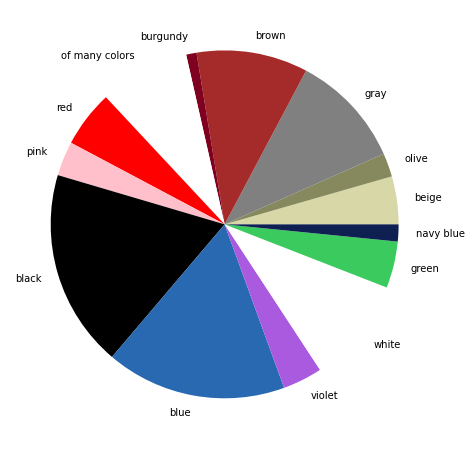

In [ ]:
colores=df.colour.unique().tolist()
plt.rcParams["figure.figsize"] = (8,8)

pais='Poland'
coloresPlot=['#d7d7a8','#86895d','gray','brown','#800020','white','red','pink','black','#2969B1','#AA5ADF','white','#3BCA5E','#0E1F51']

df_aux=df[df.country==pais]

counts=[]
for c in colores:
    counts.append(df_aux.colour[df_aux.colour==c].count())



prueba=plt.pie(counts,colors=coloresPlot, labels = colores)

#plt.legend()
plt.show()

Mediante la siguiente gráfica vemos cuales son las CATEGORÍAS MÁS POPULARES en general y en un país concreto

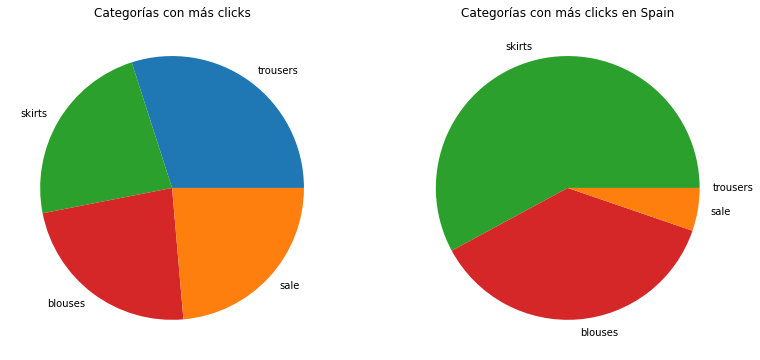

In [ ]:
categorias=df.category.unique().tolist()
plt.rcParams["figure.figsize"] = (13,13)
figure, axis = plt.subplots(1,2)

pais='Spain'
coloresPlot=['tab:blue','tab:green','tab:red','tab:orange']

df_aux=df[df.country==pais]

counts_by_country=[]
counts=[]
for c in categorias:
    counts.append(df.category[df.category==c].count())
    counts_by_country.append(df_aux.category[df_aux.category==c].count())


axis[0].pie(counts,colors=coloresPlot, labels = categorias)
axis[0].set_title("Categorías con más clicks")

axis[1].pie(counts_by_country,colors=coloresPlot, labels = categorias)
axis[1].set_title("Categorías con más clicks en {}".format(pais))
#plt.legend()
plt.show()

Visualizamos los modelos que predominan cada categoría

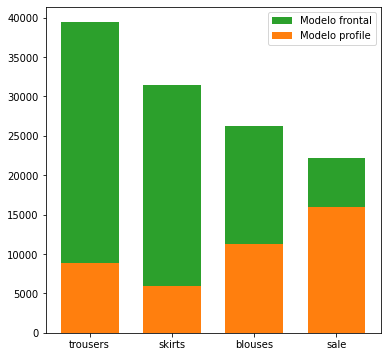

In [ ]:
modelos=df.model_photography.unique().tolist()
categorias=df.category.unique().tolist()
plt.rcParams["figure.figsize"] = (6,6)

steps=range(1,len(categorias)*2,2)
#Morado,gris,rojo,azul oscuro,celeste,verde
coloresPlot=['tab:green','tab:orange']
for k,m in enumerate(modelos):

    counts=[]
    df_aux = df[df.model_photography==m]
    
    for c in categorias:
        counts.append(df_aux.category[df_aux.category==c].count())

    plt.bar(steps,counts,1.4, label="Modelo {}".format(m), zorder=3, color=coloresPlot[k])


plt.xticks(steps, categorias)

plt.legend()
plt.show()